In [79]:
import numpy as np
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
my_page = 'https://play.google.com/store/apps/details?id=com.spotify.music&showAllReviews=true'
page = urllib.request.urlopen(my_page)
soup = BeautifulSoup(page, 'html.parser')

In [47]:
scripts = []
for script in soup.find_all('script'):
    if 'null' in script.text:
        scripts.append(script.text) 
unparsed_reviews = test[18]

In [77]:
collection = []
for word in unparsed_reviews.split(','):
    if "" in word:
        if 'null' not in word:
            if ']' not in word:
                if '[' not in word:
                    collection.append(word)
                
reviews = [x for x in collection if len(x.split())>3]
with open("reviews.txt", "w") as output:
    output.write(str(reviews))

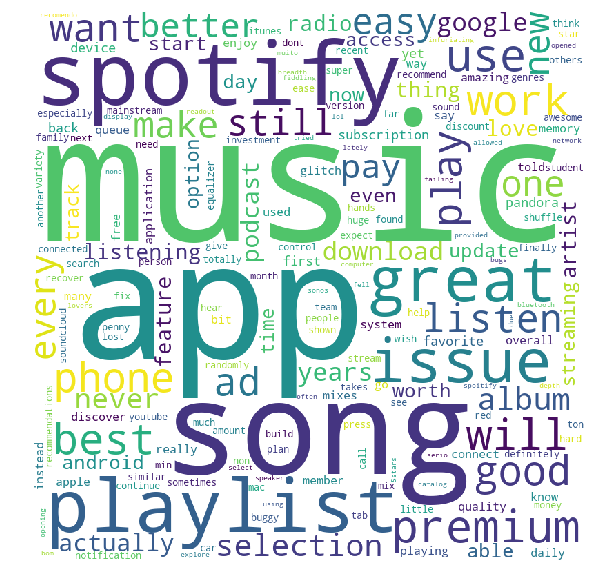

In [81]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in reviews: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 